# **Used Mobile Phones ,Tablets Pricing Dataset**

> [Datset Kaggle Link](https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data)


## **Description**

> ### Here is a sample dataset of used and new pricing data of refurbished / used devices. It contains the necessary information which are required while estimating the selling price. The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one.



## **Meta Data**
device_brand: Name of manufacturing brand

> 1.   **os**: OS on which the device runs
2. **screen_size**: Size of the screen in cm
3. **4g**: Whether 4G is available or not
4. **5g**: Whether 5G is available or not
5. **front_camera_mp**: Resolution of the rear camera in megapixels
6. **back_camera_mp**: Resolution of the front camera in megapixels
7. **internal_memory**: Amount of internal memory (ROM) in GB
8. **ram**: Amount of RAM in GB
9. **battery**: Energy capacity of the device battery in mAh
10. **weight**: Weight of the device in grams
11. **release_year**: Year when the device model was released
12. **days_used**: Number of days the used/refurbished device has been used
13. **normalized_new_price**: Normalized price of a new device of the same model
14. **normalized_used_price** (TARGET): Normalized price of the used/refurbished device

## **Importing The dataset from google drive to collab**

In [1]:
!pip install gdown
import gdown
url = "https://drive.google.com/uc?id=10wn0GTtJuNfAQn_wJTtky931Rxo6Xky0"
gdown.download(url, "used_mobile_data.csv", quiet=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=10wn0GTtJuNfAQn_wJTtky931Rxo6Xky0
To: /content/used_mobile_data.csv
100%|██████████| 278k/278k [00:00<00:00, 80.9MB/s]


'used_mobile_data.csv'

## **Importing Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import chi2_contingency

## **Converting CSV to Dataframe using pandas**

In [3]:
df = pd.read_csv("./used_mobile_data.csv")
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## **Checking for Columns containing null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [5]:
df.shape

(3454, 15)

## **Dropping rows having missing values for rear camera**

In [6]:
df2 = df.dropna(subset=['rear_camera_mp']).copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3275 non-null   object 
 1   os                     3275 non-null   object 
 2   screen_size            3275 non-null   float64
 3   4g                     3275 non-null   object 
 4   5g                     3275 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3273 non-null   float64
 7   internal_memory        3271 non-null   float64
 8   ram                    3271 non-null   float64
 9   battery                3269 non-null   float64
 10  weight                 3268 non-null   float64
 11  release_year           3275 non-null   int64  
 12  days_used              3275 non-null   int64  
 13  normalized_used_price  3275 non-null   float64
 14  normalized_new_price   3275 non-null   float64
dtypes: f

## **Searching for Outliers to decide whether columns should be filled with mean or median** 


> Creating a scatterplot using seaborn to see the outliers



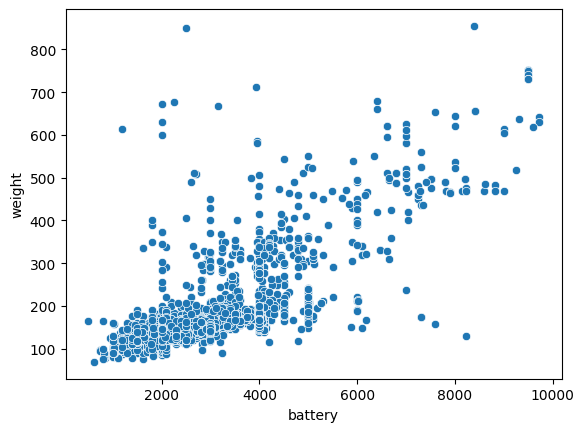

In [7]:
sns.scatterplot(x='battery', y='weight', data=df2)
plt.show()



> ### Here we can see in weights and in battery there are many outlier values therefore we use median for these columns as it is less sensitive to outliers and works well with multiple unique values



## **Filling Values of weight and battery columns by respective median of the column**


> Function to remove null values takes parameters - dataframe,column,filltype



In [8]:
def fill_null_val(df,column_name,fill_type):
  if fill_type == "mean":
    df[column_name].fillna(value=df[column_name].mean(),inplace=True)
  else:
    df[column_name].fillna(value=df[column_name].median(),inplace=True)

fill_null_val(df2,"battery","median")
fill_null_val(df2,"weight","median")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3275 non-null   object 
 1   os                     3275 non-null   object 
 2   screen_size            3275 non-null   float64
 3   4g                     3275 non-null   object 
 4   5g                     3275 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3273 non-null   float64
 7   internal_memory        3271 non-null   float64
 8   ram                    3271 non-null   float64
 9   battery                3275 non-null   float64
 10  weight                 3275 non-null   float64
 11  release_year           3275 non-null   int64  
 12  days_used              3275 non-null   int64  
 13  normalized_used_price  3275 non-null   float64
 14  normalized_new_price   3275 non-null   float64
dtypes: f

## **Filling Remaining null values with the mean of the respective columns**

In [9]:
fill_null_val(df2,"front_camera_mp","mean")
fill_null_val(df2,"internal_memory","mean")
fill_null_val(df2,"ram","mean")


In [10]:
df2.info()
df_proj = df2.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3275 non-null   object 
 1   os                     3275 non-null   object 
 2   screen_size            3275 non-null   float64
 3   4g                     3275 non-null   object 
 4   5g                     3275 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3275 non-null   float64
 7   internal_memory        3275 non-null   float64
 8   ram                    3275 non-null   float64
 9   battery                3275 non-null   float64
 10  weight                 3275 non-null   float64
 11  release_year           3275 non-null   int64  
 12  days_used              3275 non-null   int64  
 13  normalized_used_price  3275 non-null   float64
 14  normalized_new_price   3275 non-null   float64
dtypes: f

# **Converting non-numeric data type columns into numeric values**

> The function first converts the column into a categorical dtype and then generates the codes for each unique category of the column



In [11]:
def gen_cat_code(df,colname):
  return df[colname].astype("category").cat.codes

df2["device_code"] = gen_cat_code(df2,"device_brand")  
df2["os_code"] = gen_cat_code(df2,"os")
df2["4g_code"] = gen_cat_code(df2,"4g")
df2["5g_code"] = gen_cat_code(df2,"5g")

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3453
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3275 non-null   object 
 1   os                     3275 non-null   object 
 2   screen_size            3275 non-null   float64
 3   4g                     3275 non-null   object 
 4   5g                     3275 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3275 non-null   float64
 7   internal_memory        3275 non-null   float64
 8   ram                    3275 non-null   float64
 9   battery                3275 non-null   float64
 10  weight                 3275 non-null   float64
 11  release_year           3275 non-null   int64  
 12  days_used              3275 non-null   int64  
 13  normalized_used_price  3275 non-null   float64
 14  normalized_new_price   3275 non-null   float64
 15  devi

# **Standardization of columns using Standardscaler**




In [12]:
df3 = df2.copy()
scaler = StandardScaler()
col_norm=["weight","battery","screen_size","rear_camera_mp"]

df3[col_norm]= scaler.fit_transform(df3[col_norm])

stan_df=pd.DataFrame(df3,columns=df3.columns)
stan_df.head()


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_code,os_code,4g_code,5g_code
0,Honor,Android,0.233629,yes,no,0.735201,5.0,64.0,3.0,-0.037936,-0.400923,2020,127,4.307572,4.715100,10,0,1,0
1,Honor,Android,0.957709,yes,yes,0.735201,16.0,128.0,8.0,0.949615,0.338702,2020,325,5.162097,5.519018,10,0,1,1
2,Honor,Android,0.799963,yes,yes,0.735201,8.0,128.0,8.0,0.872463,0.338702,2020,162,5.111084,5.884631,10,0,1,1
3,Honor,Android,3.078229,yes,yes,0.735201,8.0,64.0,6.0,3.225612,3.286165,2020,345,5.135387,5.630961,10,0,1,1
4,Honor,Android,0.445681,yes,no,0.735201,8.0,64.0,3.0,1.489682,0.029605,2020,293,4.389995,4.947837,10,0,1,0


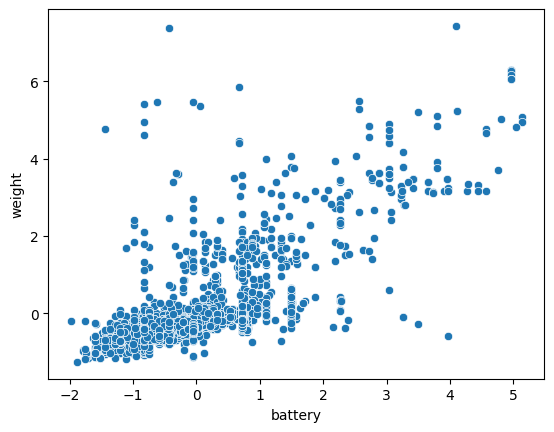

<Axes: xlabel='screen_size', ylabel='rear_camera_mp'>

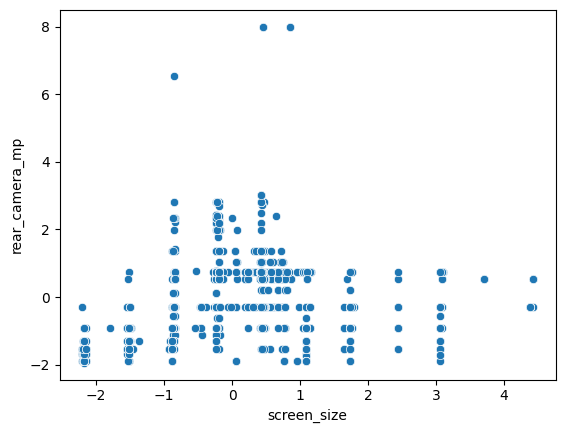

In [13]:
sns.scatterplot(x='battery',y='weight',data=df3)
plt.show()
sns.scatterplot(x='screen_size',y='rear_camera_mp',data=df3)

# **Visualization of Data using matplotlib and seaborn** 

# **Creating a Contigency Table using pandas crosstab**


> A contingency table is used to map 2 or more categorical columns to see the frequency distribution amoung them




> Here we can see the frequency distribution of different operating systems and their compatiblity with 4g network margins is a feature of crosstab which gives the total values of each category



In [14]:
ctable = pd.crosstab(index=[df3['os']], columns=[df3['4g']], margins=False)
ctable

4g,no,yes
os,,
Android,975,2060
Others,107,30
Windows,37,30
iOS,0,36




> ## Here we can see the frequency distribution between the ram and other famous device brands 


> Crosstab also has a feature of normalizing the values 





In [15]:
brand_df = df3[(df3['device_brand'] == 'Samsung') | (df3['device_brand'] == 'Apple') | (df3['device_brand'] == 'Xiaomi') | (df3['device_brand'] == 'Huawei')]
brand_ctable = pd.crosstab(index=brand_df['ram'],columns=brand_df['device_brand'],normalize=True)
brand_ctable

device_brand,Apple,Huawei,Samsung,Xiaomi
ram,,,,
0.25,0.000000,0.002703,0.002703,0.000000
1.00,0.000000,0.002703,0.001351,0.000000
1.50,0.000000,0.000000,0.001351,0.000000
2.00,0.001351,0.005405,0.008108,0.002703
3.00,0.002703,0.002703,0.009459,0.006757
4.00,0.045946,0.241892,0.406757,0.117568
6.00,0.002703,0.045946,0.013514,0.012162
8.00,0.000000,0.035135,0.008108,0.006757
12.00,0.000000,0.002703,0.009459,0.001351


# **Plotting Contingency Tables using Bar Plot**


> 1. Using barplot we can see the many outliers at 0.25 and at 12.0



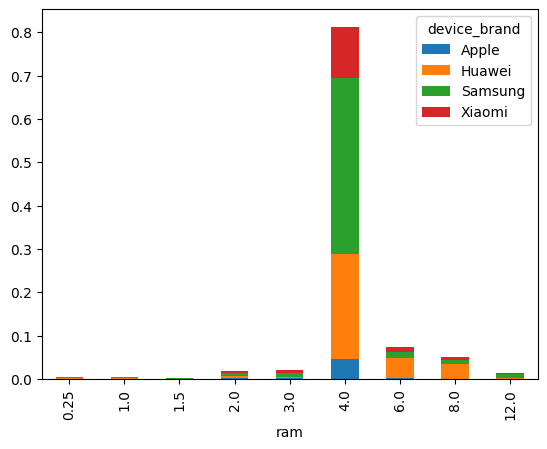

In [16]:
brand_ctable.plot(kind='bar',stacked=True)
plt.show()


# **Plotting contingency table through heatmap**
> 1. annot specifies if the values should be mentioned or not 
  2. cmap specifies the color set of the heatmap 



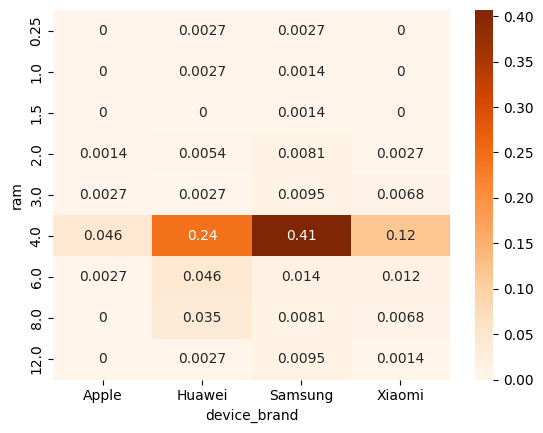

In [17]:
sns.heatmap(brand_ctable, annot=True, cmap="Oranges")
plt.show()

# **Finding outliers using boxplot**


> 1. Box represents Interquartile Range i.e middle 50%
  2. Middle Line represents median
  3. Lines Extending up and down are min max values
  4. Rest all circle,asterick are outliers 







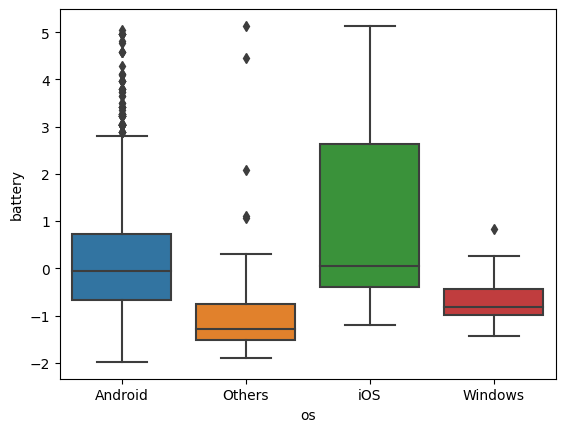

In [18]:
sns.boxplot(data=df3,x='os',y='battery')
plt.show()

# **Removal of Outliers found in boxplot**


> Using boxplot we can identify where the outliers are and remove them accordingly by excluding the specific criteria



In [19]:
df4 = df3.copy()
df4.drop(df4[(df4['os'] == 'Android') & (df4['battery'] >= 3)].index,inplace=True)
df4.drop(df4[(df4['os'] == 'Others') & (df4['battery'] >= 3)].index, inplace=True)



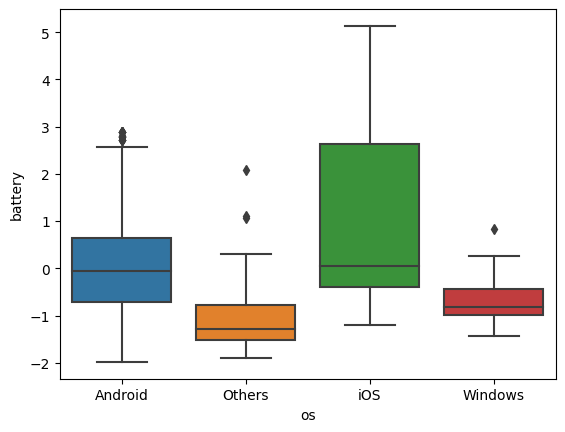

In [20]:
sns.boxplot(data=df4,x='os',y='battery')
plt.show()

In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3453
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3206 non-null   object 
 1   os                     3206 non-null   object 
 2   screen_size            3206 non-null   float64
 3   4g                     3206 non-null   object 
 4   5g                     3206 non-null   object 
 5   rear_camera_mp         3206 non-null   float64
 6   front_camera_mp        3206 non-null   float64
 7   internal_memory        3206 non-null   float64
 8   ram                    3206 non-null   float64
 9   battery                3206 non-null   float64
 10  weight                 3206 non-null   float64
 11  release_year           3206 non-null   int64  
 12  days_used              3206 non-null   int64  
 13  normalized_used_price  3206 non-null   float64
 14  normalized_new_price   3206 non-null   float64
 15  devi

# **Finding outliers using the IQR method**


> 1. This Function takes a column name and returns the outliers in that column
2. IQR takes the diff between top 25% values and bottom 25% values and checks if there are values 1.5x greater or 1.5x lesser respectively



In [22]:
def iqr_outliers(column_name):
  Q1 = df4[column_name].quantile(0.25)
  Q3 = df4[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Calculate the upper and lower bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df4[(df4[column_name] < lower_bound) | (df4[column_name] > upper_bound)]

  return outliers

iqr_outliers("internal_memory").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 34 to 3441
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           121 non-null    object 
 1   os                     121 non-null    object 
 2   screen_size            121 non-null    float64
 3   4g                     121 non-null    object 
 4   5g                     121 non-null    object 
 5   rear_camera_mp         121 non-null    float64
 6   front_camera_mp        121 non-null    float64
 7   internal_memory        121 non-null    float64
 8   ram                    121 non-null    float64
 9   battery                121 non-null    float64
 10  weight                 121 non-null    float64
 11  release_year           121 non-null    int64  
 12  days_used              121 non-null    int64  
 13  normalized_used_price  121 non-null    float64
 14  normalized_new_price   121 non-null    float64
 15  devi

# **Histogram to check frequency distribution of device brands**


> 1. Seaborn is used to provide the histogram
 2. xticks is used to change the font and position of the labels



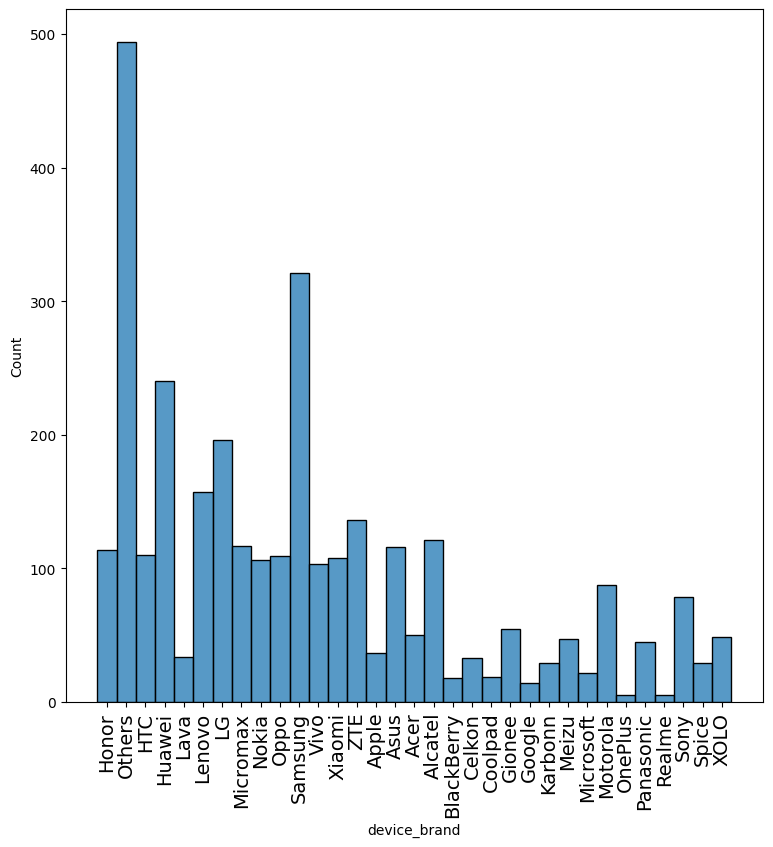

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df4, x='device_brand')

# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90,fontsize=14)

# gets the current figure and sets the figure size
fig = plt.gcf()
fig.set_size_inches(9, 9)

plt.show()

# **Partitioning of Dataset**
> **Spliting the data into random test and train datasets using sklearn library 's train_test_split which automacticallt splits the dataset for us**

> random_state allows us to set a defined random pattern so that it gives us the same random pattern every time the code block is executed

In [24]:
# Splitting the dataset into 2 parts - train with contains 75% of the dataset and test which contains 25% of the dataset
train, test = train_test_split(df4, test_size=0.25,random_state=1)

# **Visualizing the no. of rows in train,test and in total of the dataset with the help of a bar graph**

Number of rows in train:  2404
Number of rows in test:  802
Number of rows in original dataframe:  3206


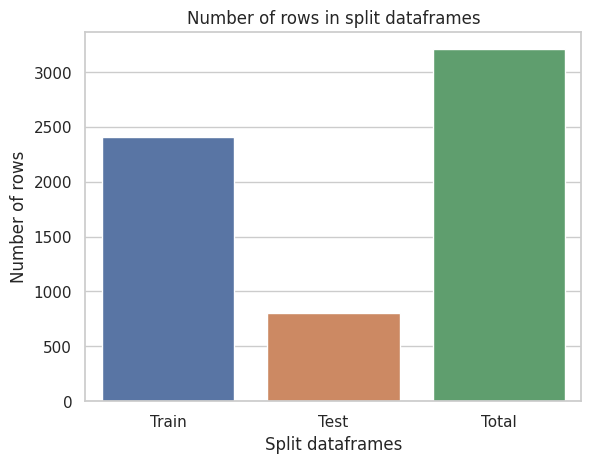

In [25]:
print("Number of rows in train: ", train.shape[0])
print("Number of rows in test: ", test.shape[0])
print("Number of rows in original dataframe: ", df4.shape[0])

# create a bar plot to visualize the proportion of rows in each split dataframe
sns.set(style="whitegrid")
sns.barplot(x=["Train", "Test","Total"], y=[train.shape[0], test.shape[0],df4.shape[0]])
plt.title("Number of rows in split dataframes")
plt.xlabel("Split dataframes")
plt.ylabel("Number of rows")
plt.show()

# **Here using statsmodel we used ztest to find the if the split has taken place correctly , it should not be skewed**

> we loop over all columns first and check which are numerical values after this the total mean is calculated and using ztest we create train_p value and test_p value 

> we then compare that value with alpha to know if data is significant from the population or not

In [26]:
for col in range(train.shape[1]):
    if(train.iloc[:,col].dtype != np.object_):
        train_col = train.iloc[:, col]
        test_col = test.iloc[:, col]
        train_z, train_p = sm.stats.ztest(train_col, value=np.mean(train_col))
        test_z, test_p = sm.stats.ztest(test_col, value=np.mean(train_col))

        alpha = 0.05
        if train_p < alpha:
            print("The train data for column", col, "is significantly different from the population with p-value", train_p)
        if test_p < alpha:
            print("The test data for column", col, "is significantly different from the population with p-value", test_p)



The test data for column 7 is significantly different from the population with p-value 0.046832736504098825
The test data for column 10 is significantly different from the population with p-value 0.038058775037192745
The test data for column 16 is significantly different from the population with p-value 0.03867233991381488


### So we didnt get any differential value message i.e our data has successfully been divided into train and test dataset 

# **Finding strong coorelation between columns using various built in coorelational tests**
> Methods used are -
>  * Pearson Coorelational Test
>  * Spearman Rank Coorelation
>  * Kendall Rank Coorelation
>  * Chi- Squared Test 


## **1. Pearson's Coorelational Test**
> Pearson Coorelation works well only on -
> * Data with no Outliers
> * Data should be normally distributed i.e ztest should be approved
> * Columns should have same number of entries i.e if a column has 5 rows all columns in comparison should have 5 rows 
> * Should have a linear relationship i.e if one values increases the other increases

Here we have set min_periods as 2 which indicates that atleast each column should have 2 values to conduct the test

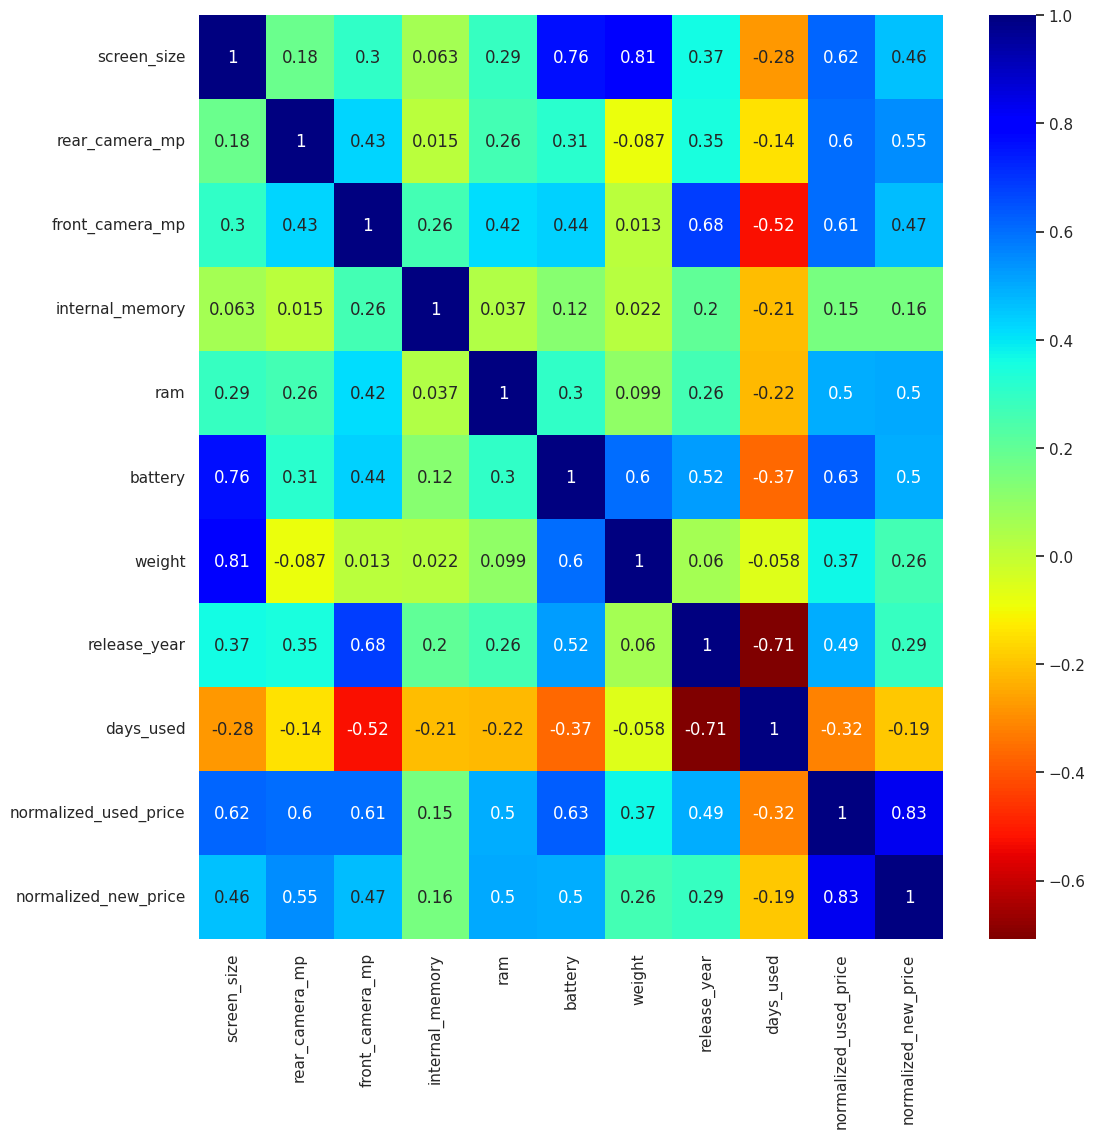

In [27]:
pearsoncorr = df4.iloc[:,0:15].corr(method='pearson',min_periods=2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(pearsoncorr,annot=True,cmap="jet_r")
plt.show()

### So here we can see there is a good coorelation between screen_size, rear_camera,front_camera and the used price which is our main prediction factor

## **2. Spearman's Coorelational Test**
> Works on - 
> * Columns having monotonic relationship i.e if a col_val increases or decreases the other col_val can also increase or decrease

The more the negative value obtained the more the columns are inversely related to each other For eg. in our result we have days_used and release_year inversely proportional to each other

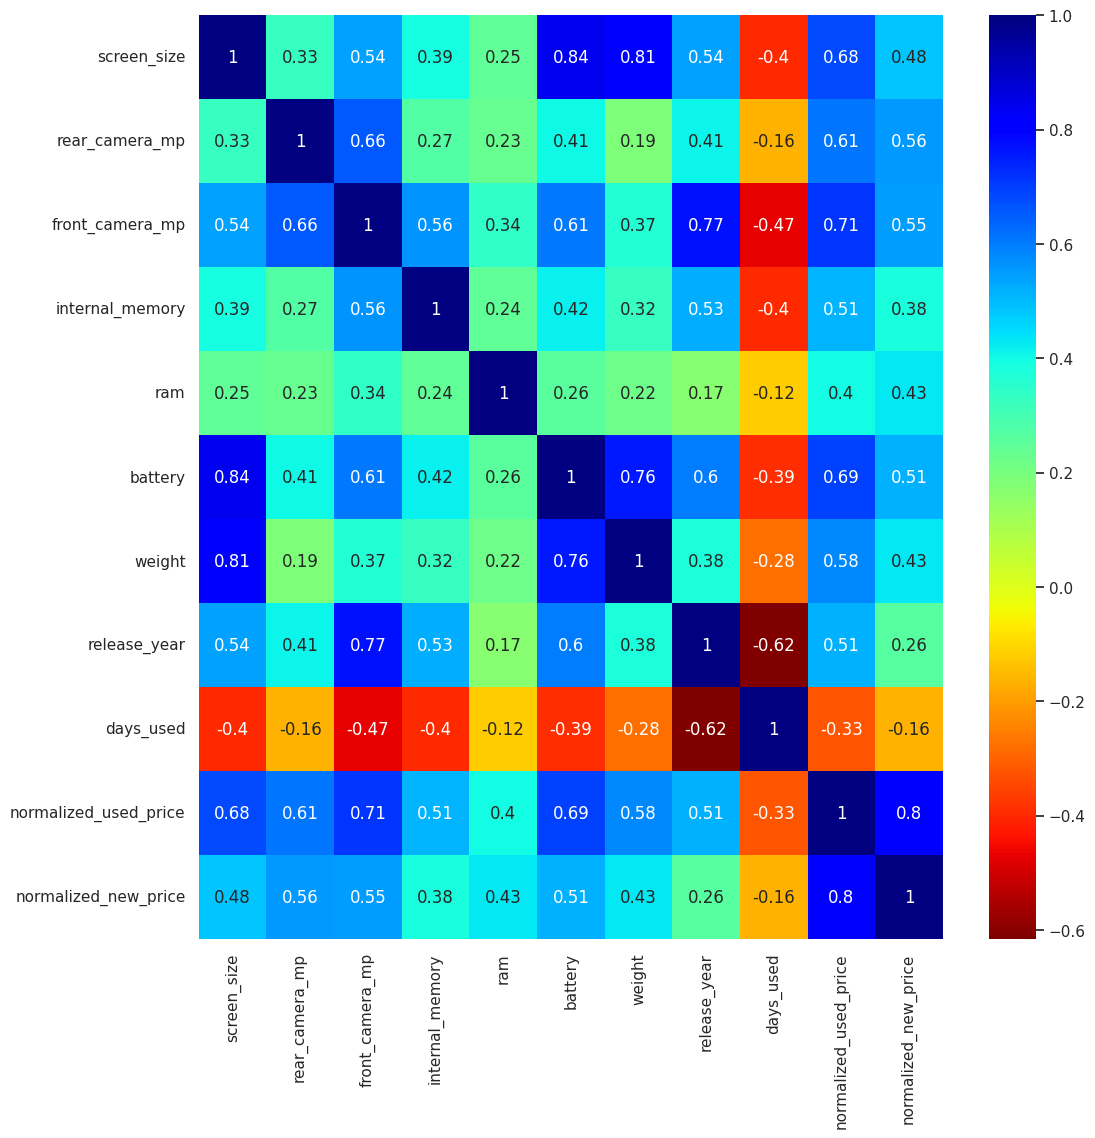

In [28]:
spearmancorr = df4.iloc[:,0:15].corr(method='spearman',min_periods=2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(spearmancorr,annot=True,cmap="jet_r")
plt.show()

> ### Here we can see that days_used has an inverse relationship between many columns including used_price which indicates that the more old the phone is the more less its value degrades

> ### Also we have a positive relationship between screen_size and weight which indicates that the more the screen_size the more the weight of the phone 

## **3. Kendall Rank Coorelation Test** 

> ### Can be used only when having rank or ordinal data.
> ### Here we have first we have assigned a rank to our RAM Values so that we can conduct Kendall Rank Analysis.







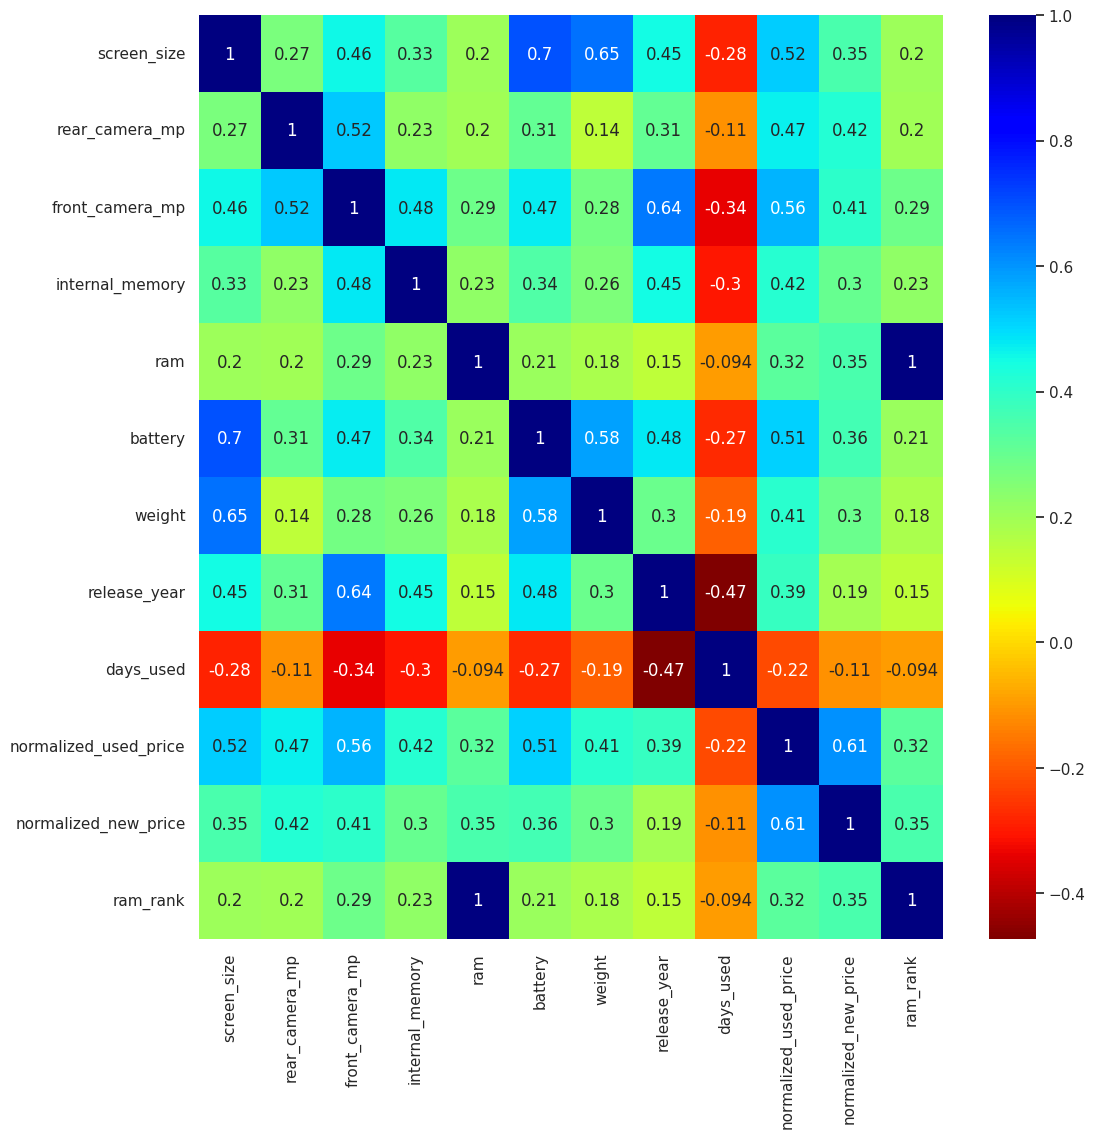

In [29]:


from scipy.stats import kendalltau

df4["ram_rank"] = df4["ram"].rank()

kendallcorr = df4.iloc[:, list(range(15)) + [19]].corr(method='kendall',min_periods=2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(kendallcorr,annot=True,cmap="jet_r")
plt.show()

### Here we can see that ram_rank as well as normalized used price have a slightly positve relationship
> ### This indicates that as ram value increases used price is also affected slightly in a positve way.

## **4. Chi-Squared Test**
> ### Chi squared test is used to find the significant between categorical variables
> ### For a proper significance between data variables test statistic value should be high , and p-value should be low (ideally <=0.05)
> ### A contingency table between categorical values is necessary to perform chi square test

###**Chi squared test returns 4 variables.**

> 1.   Chi square test statistic - diff b/w observed and expected frequencies
2.   p-value - probablity of obtaining a test statistic
3. dof - degree of freedom / no. of categorical values 
4. expected frequencies







In [30]:
chidf = df4[(df4['device_brand'] == 'Samsung') | (df4['device_brand'] == 'Apple') | (df4['device_brand'] == 'Xiaomi') | (df4['device_brand'] == 'Huawei')]
chi_ctable = pd.crosstab(index=chidf['device_brand'],columns=chidf['5g'])
chi2, p, dof, expected = chi2_contingency(chi_ctable)
print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies: \n', expected)

Chi-square test statistic: 20.255811035292325
p-value: 0.00015023162352994569
Degrees of freedom: 3
Expected frequencies: 
 [[ 34.95609065   2.04390935]
 [226.74220963  13.25779037]
 [303.26770538  17.73229462]
 [102.03399433   5.96600567]]


# **Mini Project Implementation**

In [31]:
df_proj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3275 non-null   object 
 1   os                     3275 non-null   object 
 2   screen_size            3275 non-null   float64
 3   4g                     3275 non-null   object 
 4   5g                     3275 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3275 non-null   float64
 7   internal_memory        3275 non-null   float64
 8   ram                    3275 non-null   float64
 9   battery                3275 non-null   float64
 10  weight                 3275 non-null   float64
 11  release_year           3275 non-null   int64  
 12  days_used              3275 non-null   int64  
 13  normalized_used_price  3275 non-null   float64
 14  normalized_new_price   3275 non-null   float64
dtypes: f

In [32]:
df_proj.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,13.596562,9.460208,6.067278,51.934329,3.957083,3069.170229,182.318198,2015.766412,696.062901,4.338632,5.213562
std,3.867566,4.815461,6.588088,85.195337,1.231426,1296.333394,90.600206,2.187619,235.767480,0.583759,0.677014
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.450000,2014.000000,564.000000,4.014128,4.787908
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,158.000000,2015.000000,706.000000,4.375128,5.241218
75%,15.320000,13.000000,8.000000,64.000000,4.000000,3950.000000,181.000000,2018.000000,880.000000,4.725217,5.637945
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# **Adding new Feature of device type**
> We have already seen that Screen size is highly co-related with used_price so we add another type according to the size of the device if greater than 7 inch it is a tablet else a phone

In [33]:
def get_device_type(x):
    if x <= 17.78:
        return 'Phone'
    else:
        return 'Tablet'

df_proj['device_type'] = df_proj['screen_size'].apply(lambda x: get_device_type(x))

df_proj.device_type.value_counts()

Phone     3001
Tablet     274
Name: device_type, dtype: int64

# **Removal of Outliers**
> Same as Done previously above

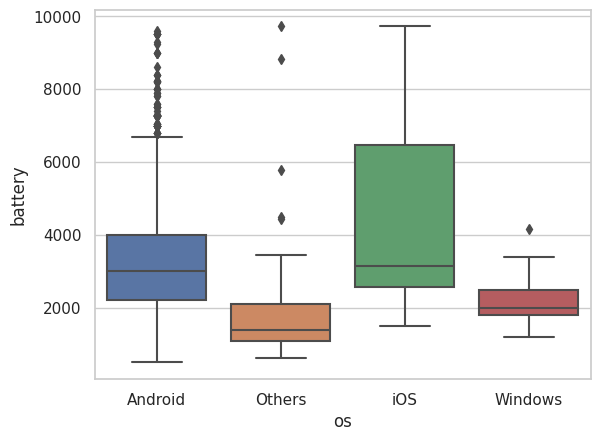

In [34]:
sns.boxplot(data=df_proj,x='os',y='battery')
plt.show()

In [35]:
df_proj.os.value_counts()

Android    3035
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

## **Removing Outliers of Battery according to the specific Operating System**

In [36]:
df_proj.drop(df_proj[(df_proj['os'] == 'Android') & (df_proj['battery'] >= 7800)].index,inplace=True)
df_proj.drop(df_proj[(df_proj['os'] == 'Others') & (df_proj['battery'] >= 5000)].index, inplace=True)
df_proj.drop(df_proj[(df_proj['os'] == 'Windows') & (df_proj['battery'] >= 4000)].index, inplace=True)

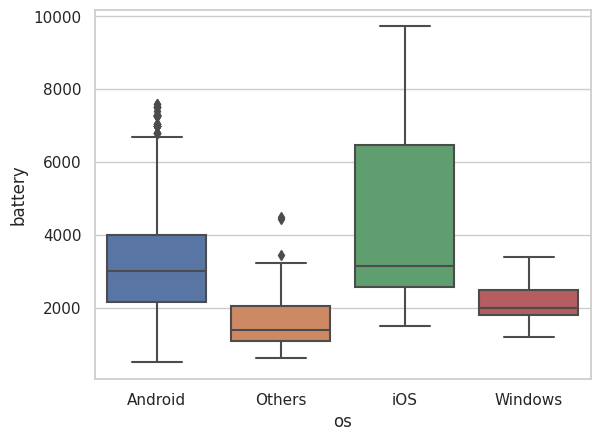

In [37]:
sns.boxplot(data=df_proj,x='os',y='battery')
plt.show()

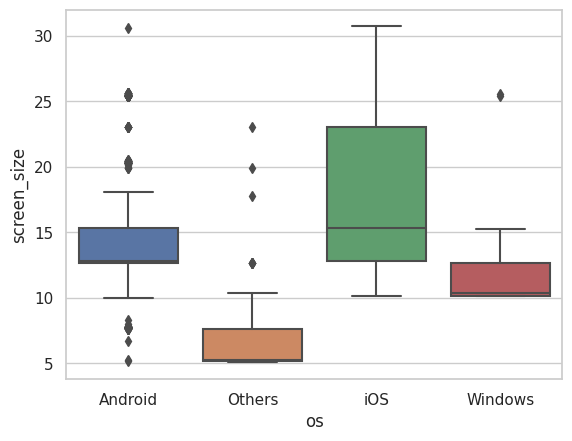

In [38]:
sns.boxplot(data=df_proj,x='os',y='screen_size')
plt.show()

## **Removing values where screensize is greater than 25 and less than 6 for windows or android devices**

In [39]:
df_proj.drop(df_proj[((df_proj['os'] == 'Android') | (df_proj['os'] == 'Windows') ) & ((df_proj['screen_size'] <= 8) | (df_proj['screen_size'] >= 25))].index,inplace=True)

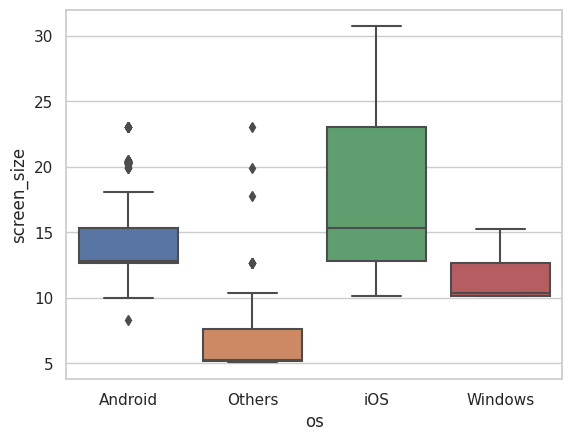

In [40]:
sns.boxplot(data=df_proj,x='os',y='screen_size')
plt.show()

# **Conversion of Categorical Variables to numeric data**

In [41]:
df_proj.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'device_type'],
      dtype='object')

>  **Mapped device brand to its numeric code**

> **Encoding other categorical variables using pandas dummies function**

In [42]:
df_proj["device_code"] = gen_cat_code(df_proj,"device_brand")  

In [43]:
ohe_df = pd.get_dummies(df_proj,None,"_",columns=['os', '4g', '5g', 'device_type'])
ohe_df.head()

,device_brand,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,...,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes,device_type_Phone,device_type_Tablet
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,1,0,0,0,0,1,1,0,1,0
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,1,0,0,0,0,1,0,1,1,0
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,1,0,0,0,0,1,0,1,1,0
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,1,0,0,0,0,1,1,0,1,0
5,Honor,16.23,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,...,1,0,0,0,0,1,1,0,1,0


In [44]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072 entries, 0 to 3453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3072 non-null   object 
 1   screen_size            3072 non-null   float64
 2   rear_camera_mp         3072 non-null   float64
 3   front_camera_mp        3072 non-null   float64
 4   internal_memory        3072 non-null   float64
 5   ram                    3072 non-null   float64
 6   battery                3072 non-null   float64
 7   weight                 3072 non-null   float64
 8   release_year           3072 non-null   int64  
 9   days_used              3072 non-null   int64  
 10  normalized_used_price  3072 non-null   float64
 11  normalized_new_price   3072 non-null   float64
 12  device_code            3072 non-null   int8   
 13  os_Android             3072 non-null   uint8  
 14  os_Others              3072 non-null   uint8  
 15  os_W

# **Removing unwanted columns and splitting data into training and test sets**

In [45]:
drop_cols = ['device_brand','normalized_used_price']

X = ohe_df.drop(columns=drop_cols,axis=1)
y = ohe_df['normalized_used_price']
X.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_new_price', 'device_code', 'os_Android', 'os_Others',
       'os_Windows', 'os_iOS', '4g_no', '4g_yes', '5g_no', '5g_yes',
       'device_type_Phone', 'device_type_Tablet'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=42)
X_train.head(2)

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes,device_type_Phone,device_type_Tablet
2925,15.32,12.0,13.0,64.0,4.00,4000.0,186.0,2019,414,5.007497,...,1,0,0,0,0,1,1,0,1,0
964,7.75,2.0,0.3,256.0,0.25,1200.0,140.0,2013,569,3.659193,...,0,1,0,0,1,0,1,0,1,0


# **Standardization of Data**

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(922, 21)

# 1). **Lasso**

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.07619140931044806
r2 score:  0.756302349960746


# 2). **Elastic Net**

In [49]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1)
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.061118934550860156
r2 score:  0.8045115471974198


# 3). **Ridge Regression**

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=1)
ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.05303440384790317
r2 score:  0.8303698578890248


# 4). **KNN Regressor**

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knnr.fit(X_train,y_train)

y_pred = knnr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.06552964408885799
r2 score:  0.7904039258901919


# 5). **Random Forest Regressor** 

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=42)
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.09669512210951794
r2 score:  0.6907213786749462


# 6). **Support Vector Machine**

In [53]:
from sklearn.svm import SVR
svr = SVR(C=10,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.05033082784908113
r2 score:  0.8390172254016917


In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean Squared Error: 0.05303483106008665
r2 score:  0.8303684914540669


# **Summary of All Models**

In [55]:
models = {
    "SVR": SVR(C=10,gamma=0.01,kernel='rbf'),
    "Random Forest": RandomForestRegressor(max_depth=2, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    "Lasso": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1),
    "Ridge": Ridge(random_state=42),
    "Linear Regression": LinearRegression(),
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "MSE": mse, "R2": r2})

results_df = pd.DataFrame(results)


In [56]:
results_df

,Model,MSE,R2
0,SVR,0.050331,0.839017
1,Random Forest,0.096695,0.690721
2,KNN,0.065530,0.790404
3,Lasso,0.076191,0.756302
4,Elastic Net,0.061119,0.804512
5,Ridge,0.053034,0.830370
6,Linear Regression,0.053035,0.830368


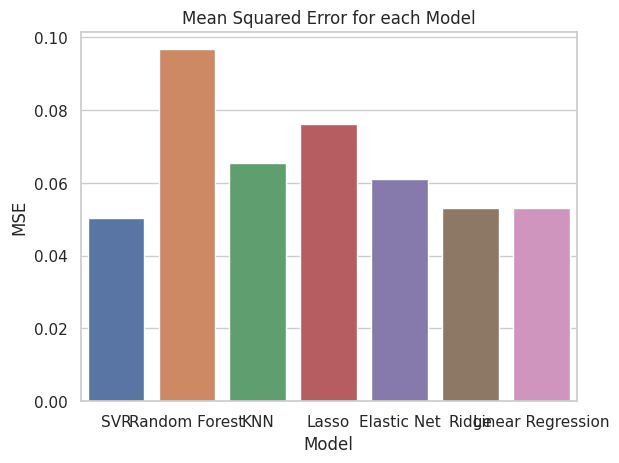

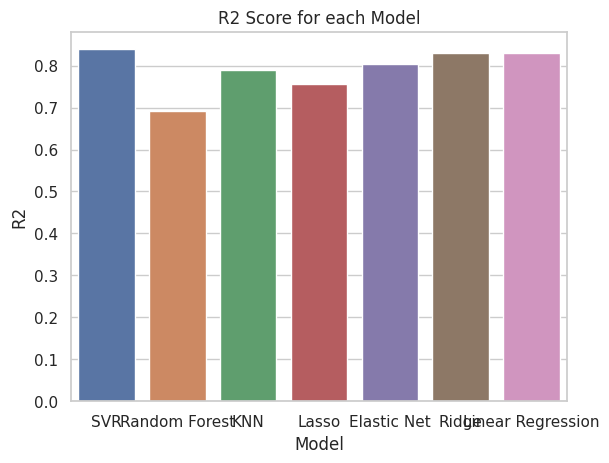

In [57]:
sns.set(style="whitegrid")
sns.barplot(x="Model", y="MSE", data=results_df)
plt.title("Mean Squared Error for each Model")
plt.show()

sns.set(style="whitegrid")
sns.barplot(x="Model", y="R2", data=results_df)
plt.title("R2 Score for each Model")
plt.show()


In [58]:
def get_brand_code(brand):
  brand_to_code = dict(zip(df_proj['device_brand'], df_proj['device_code']))
  device_code = brand_to_code.get(brand, -1)
  return device_code

In [59]:
get_brand_code('Apple')

2

In [60]:
def predict_device_used_price(device,train_cols,scalar,model):
# To predict value of used device , takes the device object, training data columns, scalar and model as parameter 
  import pandas as pd
  import numpy as np
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVR

  data = {
    'device_brand':device['device_brand'],
    'os':device['os'],
    'screen_size':device['screen_size'],
    '4g':device['4g'],
    '5g':device['5g'],
    'rear_camera_mp':device['rear_camera_mp'],
    'front_camera_mp':device['front_camera_mp'],
    'internal_memory':device['internal_memory'],
    'ram':device['ram'],
    'battery':device['battery'],
    'weight':device['weight'],
    'release_year':device['release_year'],
    'days_used': device['days_used'],
    'normalized_new_price':device['normalized_new_price'] / 100,
    'device_type':device['device_type'],
    'device_code':device['device_code']
  }

# Converting the device object to a dataframe 
  pred_df = pd.DataFrame(data, index=[0])
  print("step 1 passed")

# One hot encoding the data to convert categorical data to numeric data 
  pred_ohe_df = pd.get_dummies(pred_df,None,"_",columns=['os', '4g', '5g', 'device_type'])
  print("step 2 passed")

# Getting the columns of the predicted values after encoding
  columns_encoded = pred_ohe_df.columns.tolist()
  print("step 3 passed")

# Getting all the columns present in train and absent in prediction
  columns_missing = list(set(train_cols) - set(columns_encoded))
  print("step 4 passed")

# Filling all the missing columns with 0 to match the pred cols with the test cols
  pred_ohe_df = pred_ohe_df.reindex(columns=train_cols,fill_value=0)
  print("step 5 passed")

# Removing unwanted columns
  drop_cols = ['device_brand','normalized_used_price']
  X = pred_ohe_df.drop(columns=drop_cols,axis=1)
  print("step 6 passed")

# Standardizing the values of prediction 
  pred_scaled = scalar.transform(X)
  print("step 7 passed")
# Predicting the values and returning the final used_price
  y_pred = model.predict(pred_scaled)
  print("step 8 passed")

  return y_pred[0]




In [61]:
device_object = {
    'device_brand':'Samsung',
    'os':'Android',
    'screen_size':7.75,
    '4g':'no',
    '5g':'no',
    'rear_camera_mp':2.0,
    'front_camera_mp':0.3,
    'internal_memory':256.0,
    'ram':0.25,
    'battery':1200.0,
    'weight':240.0,
    'release_year':2013,
    'days_used': 1569,
    'normalized_new_price':165.9193,
    'device_type':'Phone' 
}

device_object['device_code'] = get_brand_code(device_object['device_brand'])


train_columns = ['device_brand',
 'screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price',
 'device_code',
 'os_Android',
 'os_Others',
 'os_Windows',
 'os_iOS',
 '4g_no',
 '4g_yes',
 '5g_no',
 '5g_yes',
 'device_type_Phone',
 'device_type_Tablet']

 
predict_device_used_price(device_object,train_columns,sc,svr)

step 1 passed
step 2 passed
step 3 passed
step 4 passed
step 5 passed
step 6 passed
step 7 passed
step 8 passed


2.5549286798877677

In [62]:
ohe_df.loc[964].normalized_used_price

2.877511642

In [63]:
# from sklearn.model_selection import GridSearchCV

# ridge_model = Ridge()

# # Define the parameter grid to search over
# param_grid = {'alpha': [0.1, 1, 10, 100]}

# # Perform grid search using 5-fold cross validation
# grid_search = GridSearchCV(ridge_model, param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # print best hyperparameters and best score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # Use the best hyperparameters to train the final model on the entire training dataset
# final_model = Ridge(alpha=best_params['alpha'])
# final_model.fit(X_train, y_train)

# # Make predictions on the test dataset using the final model
# y_pred = final_model.predict(X_test)

# # Calculate the mean squared error of the final model on the test dataset
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # print the results
# print("MSE:", mse)
# print("R-squared:", r2)
print("Best Hyperparameters: {'alpha': 10} \n Best Score: 0.8219750648736545 \n MSE: 0.05302495044044633 \n R-squared: 0.8304000945417256") 

Best Hyperparameters: {'alpha': 10} 
 Best Score: 0.8219750648736545 
 MSE: 0.05302495044044633 
 R-squared: 0.8304000945417256


In [64]:
# # Define the parameter grid to search
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto', 0.1, 0.01],
#     'kernel': ['linear', 'rbf']
# }

# # Create an instance of the SVR model
# svr = SVR()

# # Create an instance of GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and the corresponding score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # Use the best model to make predictions on the test data
# y_pred = grid_search.predict(X_test)

# # Calculate the mean squared error and r2 score of the predictions
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R2 Score:", r2)
print("Fitting 5 folds for each of 24 candidates, totalling 120 fits\n Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} \n Best Score: 0.8238092368720709 \n Mean Squared Error: 0.05033082784908113 \n R2 Score: 0.8390172254016917")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 
 Best Score: 0.8238092368720709 
 Mean Squared Error: 0.05033082784908113 
 R2 Score: 0.8390172254016917


# **Pickling the model,scalar and the predict price function**

In [65]:
import pickle

model = svr
scal = sc
train_cols = train_columns

# pickle the function, model, scalar, and train_cols together
with open('wodel.pickle', 'wb') as f:
    pickle.dump((train_cols, scal, model), f)

# **Testing the pickle file** 

In [66]:
import pickle

# Load the pickled objects into memory
with open('wodel.pickle', 'rb') as f:
    train_cols, scalar, model = pickle.load(f)

device = {
    'device_brand':'Celkon',
    'os':'Others',
    'screen_size':7.75,
    '4g':'no',
    '5g':'no',
    'rear_camera_mp':2.0,
    'front_camera_mp':0.3,
    'internal_memory':256.0,
    'ram':0.25,
    'battery':1200.0,
    'weight':140.0,
    'release_year':2013,
    'days_used': 569,
    'normalized_new_price':365.9193,
    'device_type':'Phone',
}

device['device_code'] = get_brand_code(device['device_brand'])



# used_price = predict_device_used_price(device, train_cols, scaler, model)

# Print the predicted used price
# print(f"The predicted used price is: {used_price}")
# print(device)

In [67]:
df_proj['os'].value_counts()

Android    2838
Others      134
Windows      64
iOS          36
Name: os, dtype: int64